# Importing Libraries

In [223]:
import pandas as pd
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating Dataframe and Converting it to .csv file

In [2]:
folder_path = 'train'
file_list = glob.glob(folder_path + "/*.txt")
main_dataframe = pd.DataFrame(pd.read_table(file_list[0]))
df = pd.DataFrame()
    
for i in range(0,len(file_list)):
    with open(file_list[i]) as f:
        lines = f.readlines()
        lines0 = [line.split()[0] for line in lines]
        lines1 = [line.split()[1:][-1] for line in lines]
        df1 = pd.DataFrame ([lines1[0:-1]], columns = lines0[0:-1])
        df = pd.concat([df, df1], ignore_index=True)
        
  
# creating a new csv file with
# the dataframe we created
df.to_csv('train_f.csv')

In [ ]:
folder_path = 'test'
file_list = glob.glob(folder_path + "/*.txt")
main_dataframe = pd.DataFrame(pd.read_table(file_list[0]))
df = pd.DataFrame()
    
for i in range(0,len(file_list)):
    with open(file_list[i]) as f:
        lines = f.readlines()
        lines0 = [line.split()[0] for line in lines]
        lines1 = [line.split()[1:][-1] for line in lines]
        df1 = pd.DataFrame ([lines1[0:-1]], columns = lines0[0:-1])
        df = pd.concat([df, df1], ignore_index=True)
        
  
# creating a new csv file with
# the dataframe we created
df.to_csv('test_f.csv')

# Reading .csv file and storing it in dataframe train and test

In [135]:
train = pd.read_csv('train_f.csv')

In [136]:
test = pd.read_csv('test_f.csv')

### Backing up test data in test_model

In [137]:
test_model = test.copy()

# Data Overview

In [85]:
train.shape

(45593, 21)

In [86]:
test_model.shape

(11399, 20)

In [87]:
train.head()

Unnamed: 0      ID Delivery_person_ID  Delivery_person_Age  \
0           0  0x4607     INDORES13DEL02                 37.0   
1           1  0xb379     BANGRES18DEL02                 34.0   
2           2  0x5d6d     BANGRES19DEL01                 23.0   
3           3  0x7a6a    COIMBRES13DEL02                 38.0   
4           4  0x70a2     CHENRES12DEL01                 32.0   

   Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                      4.9            22.745049             75.892471   
1                      4.5            12.913041             77.683237   
2                      4.4            12.914264             77.678400   
3                      4.7            11.003669             76.976494   
4                      4.6            12.972793             80.249982   

   Delivery_location_latitude  Delivery_location_longitude  Order_Date  ...  \
0                   22.765049                    75.912471  19-03-2022  ...   
1                   13.043041                    77.813237  25-03-2022  ...   
2                   12.924264                    77.688400  19-03-2022  ...   
3                   11.053669                    77.026494  05-04-2022  ...   
4                   13.012793                    80.289982  26-03-2022  ...   

  Time_Order_picked     Weather Road_traffic_density Vehicle_condition  \
0             11:45       Sunny                 High                 2   
1             19:50      Stormy                  Jam                 2   
2              8:45  Sandstorms                  Low                 0   
3             18:10       Sunny               Medium                 0   
4             13:45      Cloudy                 High                 1   

   Type_of_order Type_of_vehicle multiple_deliveries  Festival           City  \
0          Snack      motorcycle                 0.0        No          Urban   
1          Snack         scooter                 1.0        No  Metropolitian   
2         Drinks      motorcycle                 1.0        No          Urban   
3         Buffet      motorcycle                 1.0        No  Metropolitian   
4          Snack         scooter                 1.0        No  Metropolitian   

  Time_taken  
0       24.0  
1       33.0  
2       26.0  
3       21.0  
4       30.0  

[5 rows x 21 columns]

In [88]:
test_model.head()

Unnamed: 0      ID Delivery_person_ID  Delivery_person_Age  \
0           0  0x2318    COIMBRES13DEL01                  NaN   
1           1  0x3474     BANGRES15DEL01                 28.0   
2           2  0x9420      JAPRES09DEL03                 23.0   
3           3  0x72ee      JAPRES07DEL03                 21.0   
4           4  0xa759     CHENRES19DEL01                 31.0   

   Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                      NaN            11.003669             76.976494   
1                      4.6            12.975377             77.696664   
2                      4.5            26.911378             75.789034   
3                      4.8            26.766536             75.837333   
4                      4.6            12.986047             80.218114   

   Delivery_location_latitude  Delivery_location_longitude  Order_Date  \
0                   11.043669                    77.016494  30-03-2022   
1                   13.085377                    77.806664  29-03-2022   
2                   27.001378                    75.879034  10-03-2022   
3                   26.856536                    75.927333  02-04-2022   
4                   13.096047                    80.328114  27-03-2022   

  Time_Orderd Time_Order_picked Weather Road_traffic_density  \
0         NaN             15:05     NaN                  NaN   
1       20:30             20:35   Windy                  Jam   
2       19:35             19:45  Stormy                  Jam   
3       17:15             17:20     Fog               Medium   
4       18:25             18:40   Sunny               Medium   

   Vehicle_condition Type_of_order   Type_of_vehicle  multiple_deliveries  \
0                  3        Drinks  electric_scooter                  1.0   
1                  0         Snack        motorcycle                  1.0   
2                  0        Drinks        motorcycle                  1.0   
3                  1          Meal           scooter                  1.0   
4                  2        Drinks           scooter                  1.0   

  Festival           City  
0       No  Metropolitian  
1       No  Metropolitian  
2       No  Metropolitian  
3       No  Metropolitian  
4       No  Metropolitian

In [89]:
train.describe()

Unnamed: 0  Delivery_person_Age  Delivery_person_Ratings  \
count  45593.000000         43739.000000             43685.000000   
mean   22796.000000            29.567137                 4.633780   
std    13161.709748             5.815155                 0.334716   
min        0.000000            15.000000                 1.000000   
25%    11398.000000            25.000000                 4.500000   
50%    22796.000000            30.000000                 4.700000   
75%    34194.000000            35.000000                 4.900000   
max    45592.000000            50.000000                 6.000000   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
count         45593.000000          45593.000000                45593.000000   
mean             17.017729             70.231332                   17.465186   
std               8.185109             22.883647                    7.335122   
min             -30.905562            -88.366217                    0.010000   
25%              12.933284             73.170000                   12.988453   
50%              18.546947             75.898497                   18.633934   
75%              22.728163             78.044095                   22.785049   
max              30.914057             88.433452                   31.054057   

       Delivery_location_longitude  Vehicle_condition  multiple_deliveries  \
count                 45593.000000       45593.000000         44600.000000   
mean                     70.845702           1.023359             0.744664   
std                      21.118812           0.839065             0.572473   
min                       0.010000           0.000000             0.000000   
25%                      73.280000           0.000000             0.000000   
50%                      76.002574           1.000000             1.000000   
75%                      78.107044           2.000000             1.000000   
max                      88.563452           3.000000             3.000000   

         Time_taken  
count  45593.000000  
mean      26.294607  
std        9.383806  
min       10.000000  
25%       19.000000  
50%       26.000000  
75%       32.000000  
max       54.000000

In [90]:
test_model.describe()

Unnamed: 0  Delivery_person_Age  Delivery_person_Ratings  \
count  11399.000000         10908.000000             10892.000000   
mean    5699.000000            29.517235                 4.632786   
std     3290.752194             5.797077                 0.344081   
min        0.000000            15.000000                 1.000000   
25%     2849.500000            25.000000                 4.500000   
50%     5699.000000            30.000000                 4.700000   
75%     8548.500000            34.000000                 4.900000   
max    11398.000000            50.000000                 6.000000   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
count         11399.000000          11399.000000                11399.000000   
mean             17.099934             70.399259                   17.569497   
std               8.193510             22.773144                    7.287440   
min             -30.902872            -88.400467                    0.010000   
25%              12.933284             73.170937                   12.992532   
50%              18.551440             75.897429                   18.643481   
75%              22.732225             78.045732                   22.791226   
max              30.914057             88.433452                   31.054057   

       Delivery_location_longitude  Vehicle_condition  multiple_deliveries  
count                 11399.000000       11399.000000         11161.000000  
mean                     71.102187           1.031406             0.749664  
std                      20.693782           0.839599             0.573657  
min                       0.010000           0.000000             0.000000  
25%                      73.771081           0.000000             0.000000  
50%                      75.996959           1.000000             1.000000  
75%                      78.109004           2.000000             1.000000  
max                      88.563452           3.000000             3.000000

In [91]:
train.corr()

Unnamed: 0  Delivery_person_Age  \
Unnamed: 0                     1.000000            -0.002659   
Delivery_person_Age           -0.002659             1.000000   
Delivery_person_Ratings        0.002811            -0.067939   
Restaurant_latitude            0.004992            -0.004532   
Restaurant_longitude          -0.002155            -0.009347   
Delivery_location_latitude     0.004163             0.002489   
Delivery_location_longitude   -0.001368            -0.000495   
Vehicle_condition             -0.003369             0.003308   
multiple_deliveries           -0.003522             0.115851   
Time_taken                    -0.005518             0.299474   

                             Delivery_person_Ratings  Restaurant_latitude  \
Unnamed: 0                                  0.002811             0.004992   
Delivery_person_Age                        -0.067939            -0.004532   
Delivery_person_Ratings                     1.000000            -0.007792   
Restaurant_latitude                        -0.007792             1.000000   
Restaurant_longitude                       -0.014203             0.661784   
Delivery_location_latitude                 -0.010318             0.866378   
Delivery_location_longitude                -0.013552             0.602713   
Vehicle_condition                           0.034581            -0.033551   
multiple_deliveries                        -0.117647             0.008051   
Time_taken                                 -0.338790             0.013981   

                             Restaurant_longitude  Delivery_location_latitude  \
Unnamed: 0                              -0.002155                    0.004163   
Delivery_person_Age                     -0.009347                    0.002489   
Delivery_person_Ratings                 -0.014203                   -0.010318   
Restaurant_latitude                      0.661784                    0.866378   
Restaurant_longitude                     1.000000                    0.632293   
Delivery_location_latitude               0.632293                    1.000000   
Delivery_location_longitude              0.915026                    0.690515   
Vehicle_condition                       -0.038744                   -0.001604   
multiple_deliveries                      0.004461                    0.010277   
Time_taken                               0.007821                    0.014243   

                             Delivery_location_longitude  Vehicle_condition  \
Unnamed: 0                                     -0.001368          -0.003369   
Delivery_person_Age                            -0.000495           0.003308   
Delivery_person_Ratings                        -0.013552           0.034581   
Restaurant_latitude                             0.602713          -0.033551   
Restaurant_longitude                            0.915026          -0.038744   
Delivery_location_latitude                      0.690515          -0.001604   
Delivery_location_longitude                     1.000000          -0.001960   
Vehicle_condition                              -0.001960           1.000000   
multiple_deliveries                             0.005023          -0.097270   
Time_taken                                      0.007625          -0.234398   

                             multiple_deliveries  Time_taken  
Unnamed: 0                             -0.003522   -0.005518  
Delivery_person_Age                     0.115851    0.299474  
Delivery_person_Ratings                -0.117647   -0.338790  
Restaurant_latitude                     0.008051    0.013981  
Restaurant_longitude                    0.004461    0.007821  
Delivery_location_latitude              0.010277    0.014243  
Delivery_location_longitude             0.005023    0.007625  
Vehicle_condition                      -0.097270   -0.234398  
multiple_deliveries                     1.000000    0.387051  
Time_taken                              0.387051    1.000000

In [92]:
test_model.corr()

Unnamed: 0  Delivery_person_Age  \
Unnamed: 0                     1.000000             0.001316   
Delivery_person_Age            0.001316             1.000000   
Delivery_person_Ratings       -0.012440            -0.056203   
Restaurant_latitude           -0.005339             0.001284   
Restaurant_longitude           0.002075             0.000381   
Delivery_location_latitude    -0.003050             0.005439   
Delivery_location_longitude    0.000494            -0.002318   
Vehicle_condition             -0.001546            -0.000049   
multiple_deliveries           -0.003298             0.113892   

                             Delivery_person_Ratings  Restaurant_latitude  \
Unnamed: 0                                 -0.012440            -0.005339   
Delivery_person_Age                        -0.056203             0.001284   
Delivery_person_Ratings                     1.000000             0.011304   
Restaurant_latitude                         0.011304             1.000000   
Restaurant_longitude                        0.017036             0.662124   
Delivery_location_latitude                  0.000604             0.858425   
Delivery_location_longitude                -0.001883             0.590240   
Vehicle_condition                           0.035706            -0.049324   
multiple_deliveries                        -0.118440             0.001342   

                             Restaurant_longitude  Delivery_location_latitude  \
Unnamed: 0                               0.002075                   -0.003050   
Delivery_person_Age                      0.000381                    0.005439   
Delivery_person_Ratings                  0.017036                    0.000604   
Restaurant_latitude                      0.662124                    0.858425   
Restaurant_longitude                     1.000000                    0.611106   
Delivery_location_latitude               0.611106                    1.000000   
Delivery_location_longitude              0.899566                    0.681599   
Vehicle_condition                       -0.052553                   -0.024042   
multiple_deliveries                     -0.004590                    0.009821   

                             Delivery_location_longitude  Vehicle_condition  \
Unnamed: 0                                      0.000494          -0.001546   
Delivery_person_Age                            -0.002318          -0.000049   
Delivery_person_Ratings                        -0.001883           0.035706   
Restaurant_latitude                             0.590240          -0.049324   
Restaurant_longitude                            0.899566          -0.052553   
Delivery_location_latitude                      0.681599          -0.024042   
Delivery_location_longitude                     1.000000          -0.020173   
Vehicle_condition                              -0.020173           1.000000   
multiple_deliveries                             0.002556          -0.119135   

                             multiple_deliveries  
Unnamed: 0                             -0.003298  
Delivery_person_Age                     0.113892  
Delivery_person_Ratings                -0.118440  
Restaurant_latitude                     0.001342  
Restaurant_longitude                   -0.004590  
Delivery_location_latitude              0.009821  
Delivery_location_longitude             0.002556  
Vehicle_condition                      -0.119135  
multiple_deliveries                     1.000000

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   45593 non-null  int64  
 1   ID                           45593 non-null  object 
 2   Delivery_person_ID           45593 non-null  object 
 3   Delivery_person_Age          43739 non-null  float64
 4   Delivery_person_Ratings      43685 non-null  float64
 5   Restaurant_latitude          45593 non-null  float64
 6   Restaurant_longitude         45593 non-null  float64
 7   Delivery_location_latitude   45593 non-null  float64
 8   Delivery_location_longitude  45593 non-null  float64
 9   Order_Date                   45593 non-null  object 
 10  Time_Orderd                  43862 non-null  object 
 11  Time_Order_picked            45593 non-null  object 
 12  Weather                      44977 non-null  object 
 13  Road_traffic_den

In [94]:
test_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   11399 non-null  int64  
 1   ID                           11399 non-null  object 
 2   Delivery_person_ID           11399 non-null  object 
 3   Delivery_person_Age          10908 non-null  float64
 4   Delivery_person_Ratings      10892 non-null  float64
 5   Restaurant_latitude          11399 non-null  float64
 6   Restaurant_longitude         11399 non-null  float64
 7   Delivery_location_latitude   11399 non-null  float64
 8   Delivery_location_longitude  11399 non-null  float64
 9   Order_Date                   11399 non-null  object 
 10  Time_Orderd                  10955 non-null  object 
 11  Time_Order_picked            11399 non-null  object 
 12  Weather                      11241 non-null  object 
 13  Road_traffic_den

### Using graphical visualization to check proportionality and other factor

##### From  the above plot it seems that age range from 20 - 40 are more in number than the other age

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Density'>

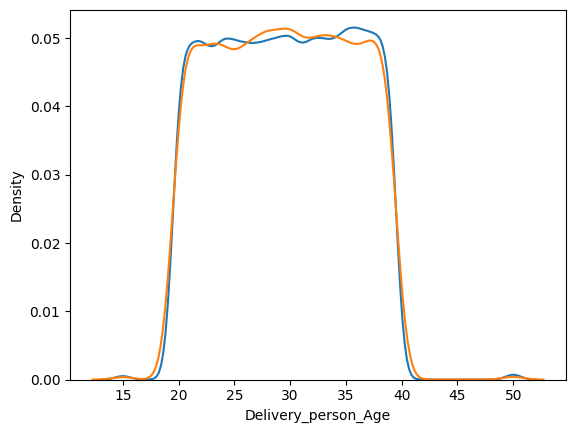

In [140]:
sns.distplot(train['Delivery_person_Age'],hist=False)
sns.distplot(test_model['Delivery_person_Age'],hist=False)

##### From  the above plot it seems that the rating range from 4-5 are more in number than the other remaining rating,some value is above 5, not normally distributed

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='Density'>

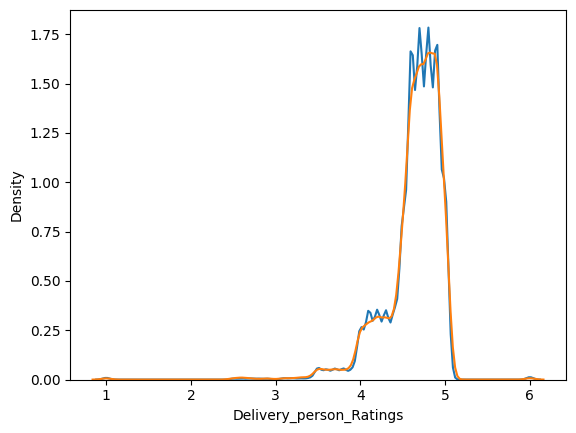

In [143]:
sns.distplot(train['Delivery_person_Ratings'],hist=False)
sns.distplot(test_model['Delivery_person_Ratings'],hist=False)

##### From  the above plot it seems that the Road_traffic_density are ordered in [low,medium,high,jam], where low will take less time and jam will take more time

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


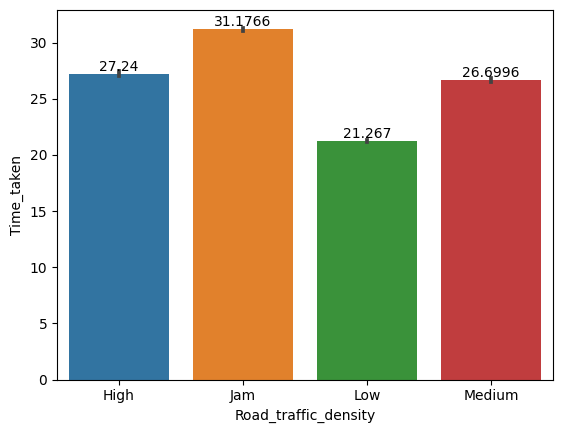

In [144]:
ax = sns.barplot(train['Road_traffic_density'],train['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)

##### From  the above plot it seems that the Type of order is independent on time taken

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


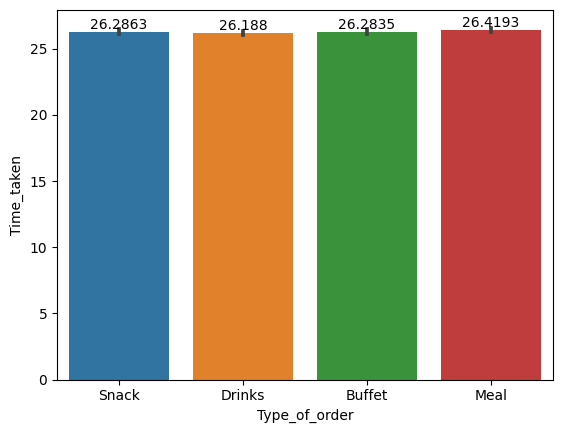

In [147]:
ax = sns.barplot(train['Type_of_order'],train['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)

##### From  the above plot it seems that the Festival are ordered in [No,Yes], where No will take less time and Yes will take more time

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


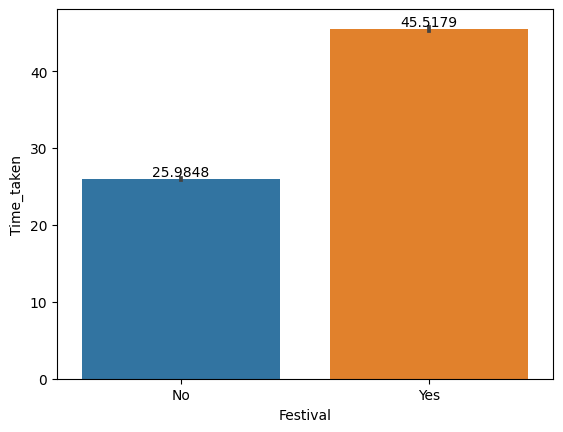

In [148]:
ax = sns.barplot(train['Festival'],train['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)

##### From  the above plot it seems that the multiple_deliveries are ordered in [0,1,2,3], where 0 will take less time and 3 will take more time

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


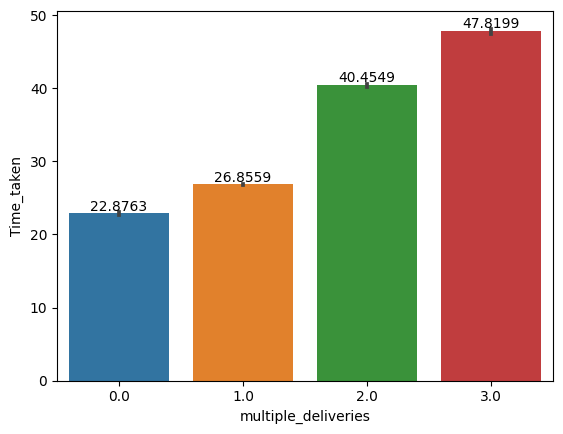

In [150]:
ax = sns.barplot(train['multiple_deliveries'],train['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)

# Data Preprocessing

#### Checking the Shape of Delivery_person_Ratings whose value is greater then 5 (Invalid)

In [155]:
train[(train['Delivery_person_Ratings']>5.0)].shape

(0, 21)

In [156]:
test_model[(test_model['Delivery_person_Ratings']>5.0)].shape

(0, 20)

#### Replacing invalid value with NaN. 

In [153]:
train.loc[train['Delivery_person_Ratings']>5.0,'Delivery_person_Ratings'] = np.nan

In [154]:
test_model.loc[test_model['Delivery_person_Ratings']>5.0,'Delivery_person_Ratings'] = np.nan

In [157]:
train['Delivery_person_Ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, nan,
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 3.4, 2.8,
       2.9, 3. ])

In [158]:
test_model['Delivery_person_Ratings'].unique()

array([nan, 4.6, 4.5, 4.8, 4.7, 4.9, 4.2, 2.7, 5. , 4.3, 3.8, 4.1, 4.4,
       3.9, 4. , 3.7, 3.5, 2.8, 3.3, 3.4, 1. , 3.2, 3.6, 2.6, 2.9, 2.5,
       3.1, 3. ])

#### Some restaurant coordinate are invalid. that need to be replaces with nan in total distance

In [159]:
train[(train['Restaurant_latitude']<=0) | (train['Restaurant_longitude']<=0)].shape

(4071, 21)

In [160]:
test_model[(test_model['Restaurant_latitude']<=0) | (test_model['Restaurant_longitude']<=0)].shape

(984, 20)

#### Using geopy to find the distance between 2 coordinate

In [161]:
pip install geopy

You should consider upgrading via the 'C:\Users\ssaur\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [162]:
import geopy.distance

#### creating function to calculate distance between 2 coordinate, will return nan if coordinate is invalid

In [165]:
def calculate_dist_lat_long(la1,lo1,la2,lo2):
    coords_1 = (la1, lo1)
    coords_2 = (la2, lo2)
    if((la1>0.00) & (lo1>0.00)):
        result = geopy.distance.great_circle(coords_1, coords_2).km
        return result
    else:
        return float('NaN')

#### Applying Function to calculate total_distance

In [166]:
train['total_distance']=np.vectorize(calculate_dist_lat_long)(train['Restaurant_latitude'],train['Restaurant_longitude'],train['Delivery_location_latitude'],train['Delivery_location_longitude'])

In [167]:
test_model['total_distance']=np.vectorize(calculate_dist_lat_long)(test_model['Restaurant_latitude'],test_model['Restaurant_longitude'],test_model['Delivery_location_latitude'],test_model['Delivery_location_longitude'])

In [168]:
train.head()

Unnamed: 0      ID Delivery_person_ID  Delivery_person_Age  \
0           0  0x4607     INDORES13DEL02                 37.0   
1           1  0xb379     BANGRES18DEL02                 34.0   
2           2  0x5d6d     BANGRES19DEL01                 23.0   
3           3  0x7a6a    COIMBRES13DEL02                 38.0   
4           4  0x70a2     CHENRES12DEL01                 32.0   

   Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                      4.9            22.745049             75.892471   
1                      4.5            12.913041             77.683237   
2                      4.4            12.914264             77.678400   
3                      4.7            11.003669             76.976494   
4                      4.6            12.972793             80.249982   

   Delivery_location_latitude  Delivery_location_longitude  Order_Date  ...  \
0                   22.765049                    75.912471  19-03-2022  ...   
1                   13.043041                    77.813237  25-03-2022  ...   
2                   12.924264                    77.688400  19-03-2022  ...   
3                   11.053669                    77.026494  05-04-2022  ...   
4                   13.012793                    80.289982  26-03-2022  ...   

      Weather Road_traffic_density Vehicle_condition Type_of_order  \
0       Sunny                 High                 2         Snack   
1      Stormy                  Jam                 2         Snack   
2  Sandstorms                  Low                 0        Drinks   
3       Sunny               Medium                 0        Buffet   
4      Cloudy                 High                 1         Snack   

   Type_of_vehicle multiple_deliveries Festival           City Time_taken  \
0       motorcycle                 0.0       No          Urban       24.0   
1          scooter                 1.0       No  Metropolitian       33.0   
2       motorcycle                 1.0       No          Urban       26.0   
3       motorcycle                 1.0       No  Metropolitian       21.0   
4          scooter                 1.0       No  Metropolitian       30.0   

  total_distance  
0       3.025154  
1      20.183558  
2       1.552760  
3       7.790412  
4       6.210147  

[5 rows x 22 columns]

In [169]:
test_model.head()

Unnamed: 0      ID Delivery_person_ID  Delivery_person_Age  \
0           0  0x2318    COIMBRES13DEL01                  NaN   
1           1  0x3474     BANGRES15DEL01                 28.0   
2           2  0x9420      JAPRES09DEL03                 23.0   
3           3  0x72ee      JAPRES07DEL03                 21.0   
4           4  0xa759     CHENRES19DEL01                 31.0   

   Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                      NaN            11.003669             76.976494   
1                      4.6            12.975377             77.696664   
2                      4.5            26.911378             75.789034   
3                      4.8            26.766536             75.837333   
4                      4.6            12.986047             80.218114   

   Delivery_location_latitude  Delivery_location_longitude  Order_Date  ...  \
0                   11.043669                    77.016494  30-03-2022  ...   
1                   13.085377                    77.806664  29-03-2022  ...   
2                   27.001378                    75.879034  10-03-2022  ...   
3                   26.856536                    75.927333  02-04-2022  ...   
4                   13.096047                    80.328114  27-03-2022  ...   

  Time_Order_picked Weather Road_traffic_density Vehicle_condition  \
0             15:05     NaN                  NaN                 3   
1             20:35   Windy                  Jam                 0   
2             19:45  Stormy                  Jam                 0   
3             17:20     Fog               Medium                 1   
4             18:40   Sunny               Medium                 2   

   Type_of_order   Type_of_vehicle multiple_deliveries  Festival  \
0         Drinks  electric_scooter                 1.0        No   
1          Snack        motorcycle                 1.0        No   
2         Drinks        motorcycle                 1.0        No   
3           Meal           scooter                 1.0        No   
4         Drinks           scooter                 1.0        No   

            City total_distance  
0  Metropolitian       6.232382  
1  Metropolitian      17.076642  
2  Metropolitian      13.406048  
3  Metropolitian      13.413663  
4  Metropolitian      17.076283  

[5 rows x 21 columns]

### After Getting Total Distance

#### From the above value, we can find the speed using total distance and time taken. We are able to found that vehicle condition = 3 will taken more time as compared to 0, 1 and 2. Hence, the order is [0,1,2,3]

In [170]:
train.groupby('Vehicle_condition').sum()[['total_distance','Time_taken']]

total_distance  Time_taken
Vehicle_condition                            
0                   132790.883203    451354.0
1                   133260.395899    366057.0
2                   134117.248129    367663.0
3                     3431.236385     13776.0

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Speed')

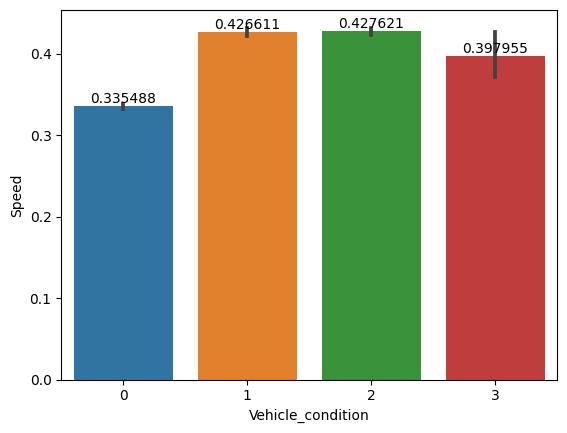

In [172]:
ax = sns.barplot(train['Vehicle_condition'],train['total_distance']/train['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_ylabel("Speed")

#### From the above value, we can find the speed using total distance and time taken. We are able to found that vehicle = bicycle will taken more time,then again less time will take by motorcycle,then electric scooter, then scooter. Hence, the order is [Scooter,electric scooter, motorcycle, bicycle]

In [173]:
train.groupby('Type_of_vehicle').sum()[['total_distance','Time_taken']]

total_distance  Time_taken
Type_of_vehicle                             
bicycle               396.420662      1797.0
electric_scooter    33156.361170     93329.0
motorcycle         234580.959334    729756.0
scooter            135466.022450    373968.0

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Speed')

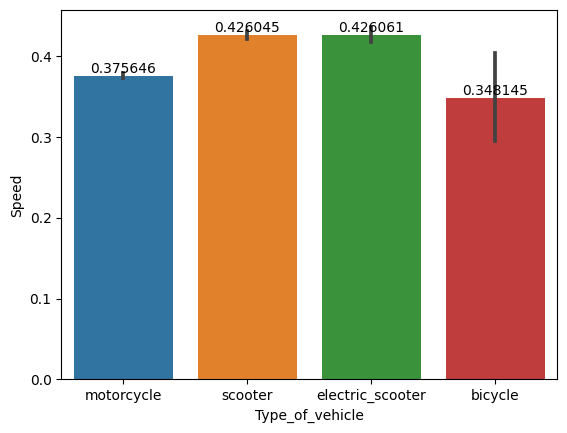

In [174]:
ax = sns.barplot(train['Type_of_vehicle'],train['total_distance']/train['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_ylabel("Speed")

#### From  the above plot it seems that the City are ordered in [Urban, Metropolitan,Semi Urban], where Urban will take less time and Semi Urban will take more time

In [175]:
train.groupby('City').sum()[['total_distance','Time_taken']]

total_distance  Time_taken
City                                     
Metropolitian   308406.942653    931258.0
Semi-Urban        1887.050235      8156.0
Urban            83205.798866    232966.0

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Speed')

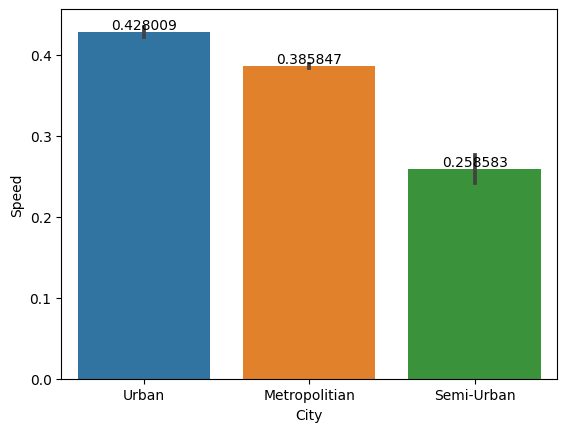

In [176]:
ax = sns.barplot(train['City'],train['total_distance']/train['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_ylabel("Speed")

#### From  the above plot it seems that the Weather are ordered in ['Sunny','Stormy','Windy','Sandstorms','Cloudy','Fog'], where sunny will  take less time, and fog will take more time

In [177]:
train.groupby('Weather').sum()[['total_distance','Time_taken']]

total_distance  Time_taken
Weather                               
Cloudy        67283.765953    217921.0
Fog           68080.652227    221324.0
Sandstorms    66125.880122    193937.0
Stormy        67474.277699    196256.0
Sunny         64331.667474    159206.0
Windy         66162.586557    193854.0

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Speed')

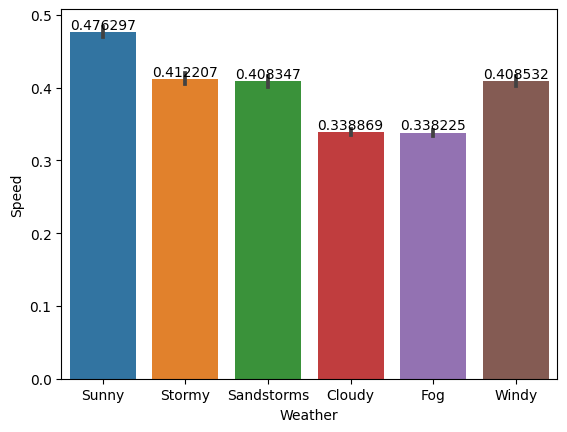

In [178]:
ax = sns.barplot(train['Weather'],train['total_distance']/train['Time_taken'])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_ylabel("Speed")

#### Changing the datatype to int for time_taken

In [179]:
train['Time_taken'] = train['Time_taken'].astype(int)

#### Dropping the Independent columns like Unnamed: 0, Delivery_person_ID, ('Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude') which is already converted to total_distance, Type_of_order, ('Order_Date','Time_Orderd','Time_Order_picked') has no realtion with time taken to deliver

In [180]:
#drop the non-required columns from Train
train.drop(columns=['Unnamed: 0','ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Type_of_order','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked'],inplace=True)

In [181]:
#drop the non-required columns from Test
test_model.drop(columns=['Unnamed: 0','ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Type_of_order','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked'],inplace=True)

In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      43739 non-null  float64
 1   Delivery_person_Ratings  43632 non-null  float64
 2   Weather                  44977 non-null  object 
 3   Road_traffic_density     44992 non-null  object 
 4   Vehicle_condition        45593 non-null  int64  
 5   Type_of_vehicle          45593 non-null  object 
 6   multiple_deliveries      44600 non-null  float64
 7   Festival                 45365 non-null  object 
 8   City                     44393 non-null  object 
 9   Time_taken               45593 non-null  int32  
 10  total_distance           41522 non-null  float64
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 3.7+ MB


In [183]:
test_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      10908 non-null  float64
 1   Delivery_person_Ratings  10882 non-null  float64
 2   Weather                  11241 non-null  object 
 3   Road_traffic_density     11245 non-null  object 
 4   Vehicle_condition        11399 non-null  int64  
 5   Type_of_vehicle          11399 non-null  object 
 6   multiple_deliveries      11161 non-null  float64
 7   Festival                 11334 non-null  object 
 8   City                     11075 non-null  object 
 9   total_distance           10415 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 890.7+ KB


In [184]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   11399 non-null  int64  
 1   ID                           11399 non-null  object 
 2   Delivery_person_ID           11399 non-null  object 
 3   Delivery_person_Age          10908 non-null  float64
 4   Delivery_person_Ratings      10892 non-null  float64
 5   Restaurant_latitude          11399 non-null  float64
 6   Restaurant_longitude         11399 non-null  float64
 7   Delivery_location_latitude   11399 non-null  float64
 8   Delivery_location_longitude  11399 non-null  float64
 9   Order_Date                   11399 non-null  object 
 10  Time_Orderd                  10955 non-null  object 
 11  Time_Order_picked            11399 non-null  object 
 12  Weather                      11241 non-null  object 
 13  Road_traffic_den

# Splitting The Data into train and test

#### Time_taken column as target column, remaining column are input

In [185]:
X_train = train.drop(columns=['Time_taken'])

In [186]:
y_train = train['Time_taken']

In [187]:
X_test = test_model

In [188]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      43739 non-null  float64
 1   Delivery_person_Ratings  43632 non-null  float64
 2   Weather                  44977 non-null  object 
 3   Road_traffic_density     44992 non-null  object 
 4   Vehicle_condition        45593 non-null  int64  
 5   Type_of_vehicle          45593 non-null  object 
 6   multiple_deliveries      44600 non-null  float64
 7   Festival                 45365 non-null  object 
 8   City                     44393 non-null  object 
 9   total_distance           41522 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [189]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Time_taken
Non-Null Count  Dtype
--------------  -----
45593 non-null  int32
dtypes: int32(1)
memory usage: 178.2 KB


In [190]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      10908 non-null  float64
 1   Delivery_person_Ratings  10882 non-null  float64
 2   Weather                  11241 non-null  object 
 3   Road_traffic_density     11245 non-null  object 
 4   Vehicle_condition        11399 non-null  int64  
 5   Type_of_vehicle          11399 non-null  object 
 6   multiple_deliveries      11161 non-null  float64
 7   Festival                 11334 non-null  object 
 8   City                     11075 non-null  object 
 9   total_distance           10415 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 890.7+ KB


# Column Transformer

#### trf1 - Simple Imputer

In [191]:
#1st Imputation Transformer
trf1 = ColumnTransformer([
        ('impute_age',SimpleImputer(),[0]),
        ('impute_rating',SimpleImputer(),[1]),
        ('impute_weather',SimpleImputer(strategy='most_frequent'),[2]),
        ('impute_road_traffic_density',SimpleImputer(strategy='most_frequent'),[3]),
        ('impute_multiple_deliveries',SimpleImputer(strategy='most_frequent'),[6]),
        ('impute_festival',SimpleImputer(strategy='most_frequent'),[7]),
        ('impute_city',SimpleImputer(strategy='most_frequent'),[8]),
        ('impute_total_distance',SimpleImputer(),[9])
    ],remainder='passthrough')

In [192]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_age', SimpleImputer(), [0]),
                                ('impute_rating', SimpleImputer(), [1]),
                                ('impute_weather',
                                 SimpleImputer(strategy='most_frequent'), [2]),
                                ('impute_road_traffic_density',
                                 SimpleImputer(strategy='most_frequent'), [3]),
                                ('impute_multiple_deliveries',
                                 SimpleImputer(strategy='most_frequent'), [6]),
                                ('impute_festival',
                                 SimpleImputer(strategy='most_frequent'), [7]),
                                ('impute_city',
                                 SimpleImputer(strategy='most_frequent'), [8]),
                                ('impute_total_distance', SimpleImputer(),
                                 [9])])

#### trf2 - Ordinal Encoder

In [193]:
oe = OrdinalEncoder(categories=[[0,1,2,3],[0.0,1.0,2.0,3.0],['Low', 'Medium','High','Jam'],['Sunny','Stormy','Windy','Sandstorms','Cloudy','Fog'],['scooter','electric_scooter','motorcycle','bicycle'],['Urban','Metropolitian','Semi-Urban'],['No','Yes']])

In [194]:
oe

OrdinalEncoder(categories=[[0, 1, 2, 3], [0.0, 1.0, 2.0, 3.0],
                           ['Low', 'Medium', 'High', 'Jam'],
                           ['Sunny', 'Stormy', 'Windy', 'Sandstorms', 'Cloudy',
                            'Fog'],
                           ['scooter', 'electric_scooter', 'motorcycle',
                            'bicycle'],
                           ['Urban', 'Metropolitian', 'Semi-Urban'],
                           ['No', 'Yes']])

In [195]:
#2nd OrdinalEncoder
trf2 = ColumnTransformer([
    ('ord_enco',oe,[8,4,3,2,9,6,5])], remainder='passthrough')

In [196]:
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord_enco',
                                 OrdinalEncoder(categories=[[0, 1, 2, 3],
                                                            [0.0, 1.0, 2.0,
                                                             3.0],
                                                            ['Low', 'Medium',
                                                             'High', 'Jam'],
                                                            ['Sunny', 'Stormy',
                                                             'Windy',
                                                             'Sandstorms',
                                                             'Cloudy', 'Fog'],
                                                            ['scooter',
                                                             'electric_scooter',
                                                             'motorcycle',
                                                             'bicycle'],
                                                            ['Urban',
                                                             'Metropolitian',
                                                             'Semi-Urban'],
                                                            ['No', 'Yes']]),
                                 [8, 4, 3, 2, 9, 6, 5])])

#### trf3 - Min Max Scaling

In [197]:
#3rd Scaling
trf3 = ColumnTransformer([
    ('scale_1', MinMaxScaler(), slice(0,10))
])

In [198]:
trf3

ColumnTransformer(transformers=[('scale_1', MinMaxScaler(),
                                 slice(0, 10, None))])

#### trf4 - Model Selection - Linear Regression

In [199]:
#4th Model
from sklearn.linear_model import LinearRegression
trf4 = LinearRegression()

In [200]:
trf4

LinearRegression()

#### Pipeline - fitting data 

In [201]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4)
    
])

In [202]:
#fit data
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [0]),
                                                 ('impute_rating',
                                                  SimpleImputer(), [1]),
                                                 ('impute_weather',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [2]),
                                                 ('impute_road_traffic_density',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3]),
                                                 ('impute_multiple_deliveries',
                                                  SimpleImputer(strategy='most...
                                                                              3],
                                                                             [0.0,
                                                                              1.0,
                                                                              2.0,
                                                                              3.0],
                                                                             ['Low',
                                                                              'Medium',
                                                                              'High',
                                                                              'Jam'],
                                                                             ['Sunny',
                                                                              'Stormy',
                                                                              'Windy',
                                                                              'Sandstorms',
                                                                              'Cloudy',
                                                                              'Fog'],
                                                                             ['scooter',
                                                                              'electric_scooter',
                                                                              'motorcycle',
                                                                              'bicycle'],
                                                                             ['Urban',
                                                                              'Metropolitian',
                                                                              'Semi-Urban'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  [8, 4, 3, 2, 9, 6, 5])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale_1', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4', LinearRegression())])

# Predicting

In [203]:
y_pred = pipe.predict(X_test)

In [217]:
y_pred.round().astype(int)

array([22, 35, 31, ..., 22, 28, 20])

In [224]:
test['Time_taken (min)'] = y_pred

In [225]:
test

Unnamed: 0      ID Delivery_person_ID  Delivery_person_Age  \
0               0  0x2318    COIMBRES13DEL01                  NaN   
1               1  0x3474     BANGRES15DEL01                 28.0   
2               2  0x9420      JAPRES09DEL03                 23.0   
3               3  0x72ee      JAPRES07DEL03                 21.0   
4               4  0xa759     CHENRES19DEL01                 31.0   
...           ...     ...                ...                  ...   
11394       11394  0x6909      JAPRES01DEL01                 35.0   
11395       11395  0x443b      JAPRES11DEL01                 33.0   
11396       11396  0x1ea5      SURRES11DEL03                  NaN   
11397       11397  0x22d4      VADRES03DEL02                 27.0   
11398       11398  0xb7be     CHENRES07DEL02                 39.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                          NaN            11.003669             76.976494   
1                          4.6            12.975377             77.696664   
2                          4.5            26.911378             75.789034   
3                          4.8            26.766536             75.837333   
4                          4.6            12.986047             80.218114   
...                        ...                  ...                   ...   
11394                      4.6            26.905190             75.810753   
11395                      4.9            26.902940             75.793007   
11396                      NaN            21.157735             72.768778   
11397                      4.7            22.320000             73.170000   
11398                      5.0            13.081878             80.248519   

       Delivery_location_latitude  Delivery_location_longitude  Order_Date  \
0                       11.043669                    77.016494  30-03-2022   
1                       13.085377                    77.806664  29-03-2022   
2                       27.001378                    75.879034  10-03-2022   
3                       26.856536                    75.927333  02-04-2022   
4                       13.096047                    80.328114  27-03-2022   
...                           ...                          ...         ...   
11394                   27.015190                    75.920753  27-03-2022   
11395                   26.912940                    75.803007  11-03-2022   
11396                   21.217735                    72.828778  11-03-2022   
11397                   22.450000                    73.300000  06-03-2022   
11398                   13.131878                    80.298519  24-03-2022   

       ... Time_Order_picked     Weather Road_traffic_density  \
0      ...             15:05         NaN                  NaN   
1      ...             20:35       Windy                  Jam   
2      ...             19:45      Stormy                  Jam   
3      ...             17:20         Fog               Medium   
4      ...             18:40       Sunny               Medium   
...    ...               ...         ...                  ...   
11394  ...             21:45       Sunny                  Jam   
11395  ...             11:45  Sandstorms                 High   
11396  ...             21:05         NaN                  NaN   
11397  ...             18:40  Sandstorms               Medium   
11398  ...             22:25       Windy                  Low   

      Vehicle_condition  Type_of_order   Type_of_vehicle multiple_deliveries  \
0                     3         Drinks  electric_scooter                 1.0   
1                     0          Snack        motorcycle                 1.0   
2                     0         Drinks        motorcycle                 1.0   
3                     1           Meal           scooter                 1.0   
4                     2         Drinks           scooter                 1.0   
...                 ...            ...               ..

# Creating a new csv file with the dataframe we created

In [226]:
test[['ID','Time_taken (min)']].to_csv('test.csv',index=False)